<a href="https://colab.research.google.com/github/pranavgupta0001/yorkUCourses/blob/main/phys4060/phys4060_esse4020_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# packages

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import periodogram, correlate
from numpy.fft import fft, fftfreq

# Series Setup

In [217]:
# Define sinusoid parameters
np.random.seed(52)

# Number of sinusoids
num_sinusoids = 7


# Frequencies (at least four octaves wide)
frequencies = np.logspace(0, 4, num_sinusoids, base=2)

# Amplitudes (ratio of largest to smallest amplitude is at least 10)
amplitudes = np.linspace(1, 10, num_sinusoids)
# define the noise
noise_amplitude = amplitudes[0]+ (amplitudes[1] - amplitudes[0]) / 2
print(amplitudes)
print(noise_amplitude)
# shuffle the amplitudes
np.random.shuffle(amplitudes)

# Phases
phases = np.random.uniform(0, 2*np.pi, num_sinusoids)

# Sampling interval delta, ∆
Tmin = 1 / frequencies[-1]  # period of the wave with the smallest period
delta = 0.25 * Tmin

# Time vector (slightly longer than the largest period)
Tmax = 1 / frequencies[0]  # period of the wave with the largest period
##################################extend it here###############################
t = np.arange(0, 2*Tmax + 25*delta, delta)
###############################################################################



############2
# Frequencies (at least four octaves wide)
frequencies2 = 1.5*frequencies#np.logspace(0, 4, num_sinusoids, base=2)

# Amplitudes (ratio of largest to smallest amplitude is at least 10)
amplitudes2 = 1.5*amplitudes#np.linspace(1.5, 15, num_sinusoids)
# define the noise
noise_amplitude2 =amplitudes2[1]+ (amplitudes2[3] - amplitudes2[1]) / 2.5
print(amplitudes2)
print(noise_amplitude2)
np.random.shuffle(amplitudes2)

# Phases
phases2 = np.random.uniform(0, 2*np.pi, num_sinusoids)

# Sampling interval delta, ∆
Tmin2 = 1 / frequencies2[-1]  # period of the wave with the smallest period
delta2 = 0.25 * Tmin2

# Time vector (slightly longer than the largest period)
Tmax2 = 1 / frequencies2[0]  # period of the wave with the largest period

##################################extend it here###############################
t2 = np.arange(0, 2*Tmax2 + 25*delta2, delta2)
##################################extend it here###############################

[ 1.   2.5  4.   5.5  7.   8.5 10. ]
1.75
[15.    1.5   6.    3.75  8.25 10.5  12.75]
2.4


IndexError: ignored

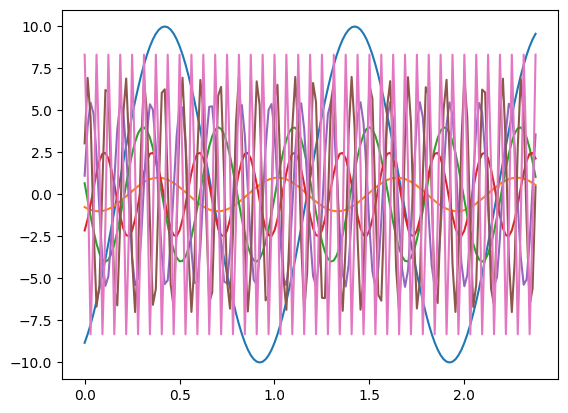

In [158]:
# Generate sinusoids
sinusoids = []
for i in range(num_sinusoids):
    sinusoid = amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i])
    sinusoids.append(sinusoid)
    plt.plot(t, sinusoid, label=f'f={frequencies[i]:.2f}Hz, A={amplitudes[i]:.2f}')

plt.title('Individual Sinusoids for series#1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [143]:
amplitudes2

array([ 1.5 ,  8.25, 10.5 ,  6.  , 12.75,  3.75, 15.  ])

In [218]:
num_sinusoids = 9

   Frequency (Hz)  Amplitude  Phase (radians)
0        1.000000       10.0         5.201502
1        1.587401        1.0         3.991163
2        2.519842        4.0         2.974057
3        4.000000        2.5         5.252267
4        6.349604        5.5         0.203987
5       10.079368        7.0         0.449932
6       16.000000        8.5         1.365853
   Frequency (Hz)  Amplitude  Phase (radians)
0        1.500000       1.50         3.184753
1        2.381102       8.25         3.073211
2        3.779763      10.50         2.676172
3        6.000000       6.00         1.652583
4        9.524406      12.75         2.906600
5       15.119053       3.75         2.114268
6       24.000000      15.00         2.150509
7       57.600000      12.00         2.520000
8       72.000000       7.52         1.250000


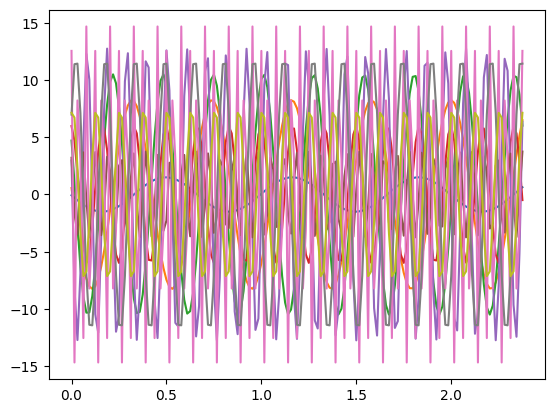

In [219]:


nyquist_frequency = 1 / (2 * delta2)

# Frequencies higher than the Nyquist frequency
high_freq1 = 1.2 * nyquist_frequency
high_freq2 = 1.5 * nyquist_frequency
frequencies2 = np.append(frequencies2, high_freq1)
frequencies2 = np.append(frequencies2, high_freq2)
amplitudes2 = np.append(amplitudes2, 12)
amplitudes2 = np.append(amplitudes2, 7.52)
phases2 = np.append(phases2, 2.52)
phases2 = np.append(phases2, 1.25)

##########################

if len(t2)>len(t):
  t=t2
else:
  t2=t




############





# Generate sinusoids
sinusoids2 = []
for i in range(num_sinusoids):
    sinusoid2 = amplitudes2[i] * np.sin(2 * np.pi * frequencies2[i] * t2 + phases2[i])
    sinusoids2.append(sinusoid2)
    plt.plot(t2, sinusoid2, label=f'f={frequencies2[i]:.2f}Hz, A={amplitudes2[i]:.2f}')



# Table with the characteristics of the waves
wave_characteristics = pd.DataFrame({
    'Frequency (Hz)': frequencies,
    'Amplitude': amplitudes,
    'Phase (radians)': phases
})
print(wave_characteristics)

# Table with the characteristics of the waves
wave_characteristics2 = pd.DataFrame({
    'Frequency (Hz)': frequencies2,
    'Amplitude': amplitudes2,
    'Phase (radians)': phases2
})
print(wave_characteristics2)

In [136]:
high_freq1, high_freq2

(57.599999999999994, 72.0)

In [164]:
noise_amplitude2, noise_amplitude

(2.4, 1.75)

In [165]:
#add a linear trend and random noise to each series
# Linear trend
slope1 = 0.52
slope2 = -0.71
intercept1 = 25
intercept2 = 52
linear_trend1 = slope1 * t + intercept1
linear_trend2 = slope2 * t2 + intercept2

# Random noise (between the two smallest amplitudes)
l = 1
noise1 = np.random.uniform(-l*noise_amplitude, l*noise_amplitude, len(t))

noise2 = np.random.uniform(-l*noise_amplitude2, l*noise_amplitude2, len(t2))

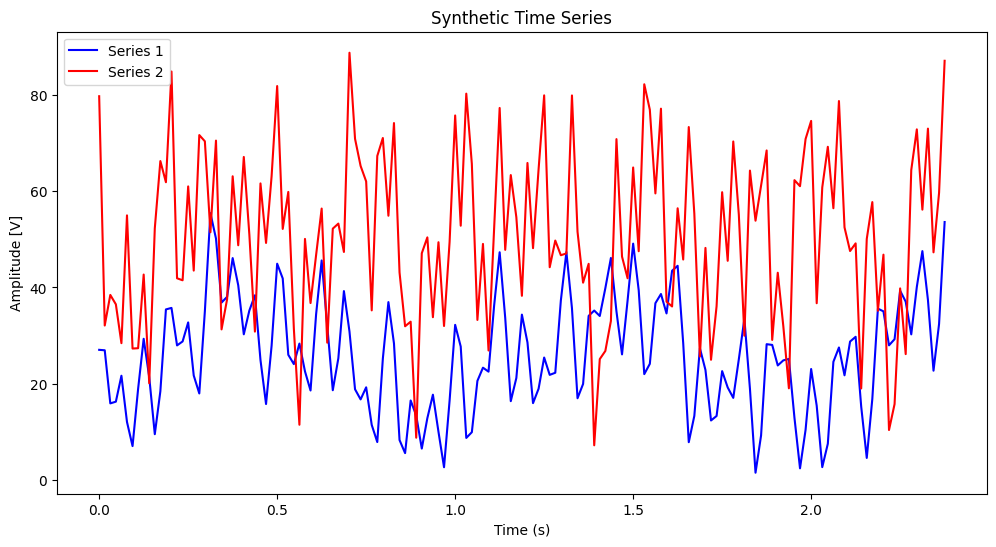

In [166]:
# Combine sinusoids, linear trend, and noise
series1 = sum(sinusoids)    + linear_trend1+ noise1
series2 = sum(sinusoids2)  + linear_trend2+ noise2

# Plotting
plt.figure(figsize=(12, 6))

#plt.subplot(2, 1, 1)
plt.plot(t, series1, label='Series 1', color='blue')
plt.title('Synthetic Time Series')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude [V]')
#plt.grid(True)

#plt.subplot(2, 1, 2)
plt.plot(t, series2, label='Series 2', color='red')
# plt.title('Synthetic Time Series 2')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
#plt.grid(True)
plt.legend()
#plt.tight_layout()
plt.show()

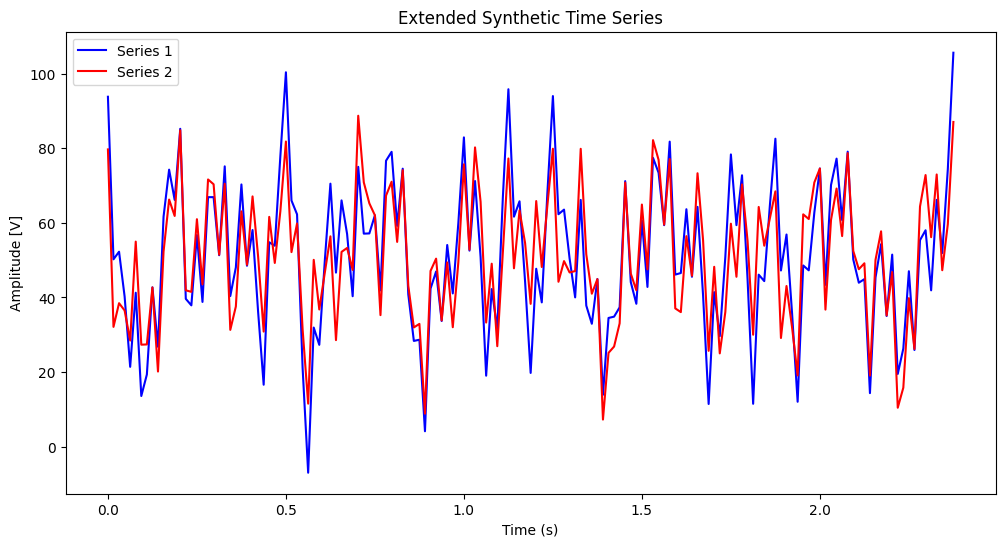

In [206]:
# Combine sinusoids, linear trend, and noise
#seriesE1 = sum(sinusoids)   + noise1 + linear_trend1
#seriesE2 = sum(sinusoids2)  + noise2 + linear_trend2
# Plotting
plt.figure(figsize=(12, 6))
#tE = t
#tE2 = t2
#plt.subplot(2, 1, 1)
plt.plot(tE, seriesE1, label='Series 1', color='blue')
plt.title('Extended Synthetic Time Series')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude [V]')
#plt.grid(True)

#plt.subplot(2, 1, 2)
plt.plot(tE2, seriesE2, label='Series 2', color='red')
# plt.title('Synthetic Time Series 2')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude [m]')
#plt.grid(True)
plt.legend()
#plt.tight_layout()
plt.show()

In [167]:
seriesE2E = seriesE2

In [197]:
seriesE2 = series2

#analyses

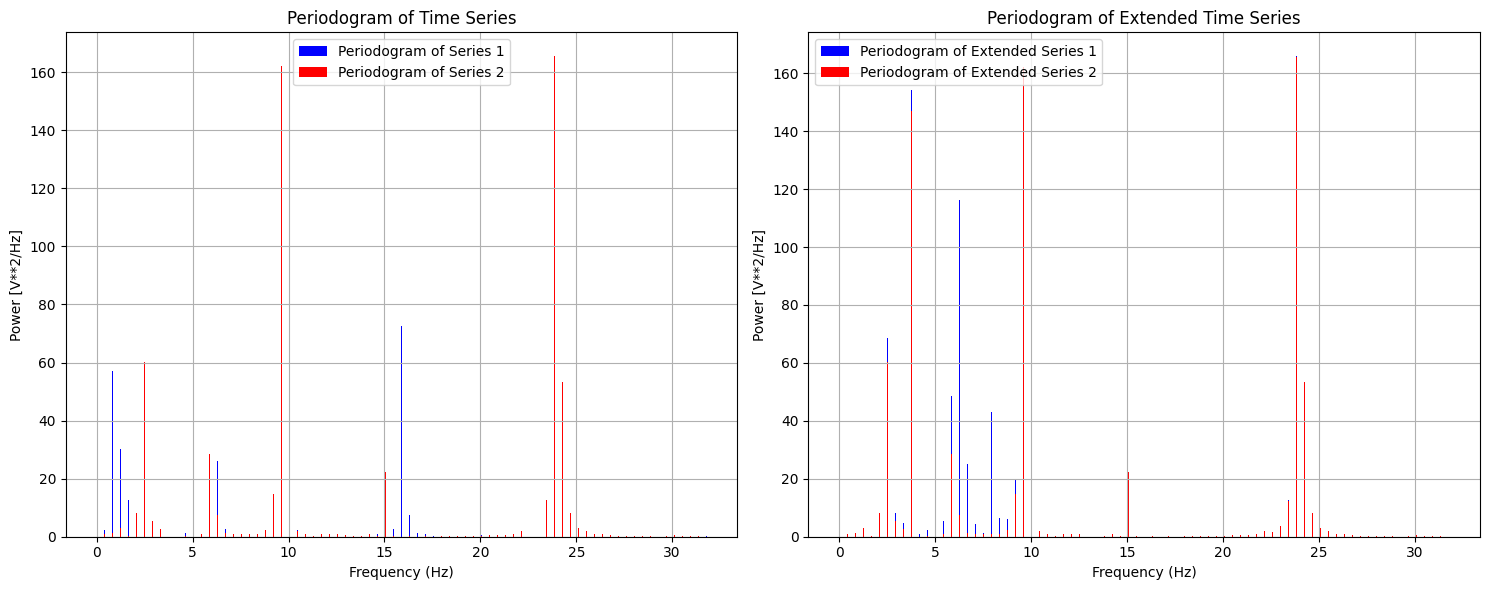

In [198]:
# Calculate the periodogram for the original series
frequencies1, Pxx_den1 = periodogram(series1, fs=1/delta)
frequencies2, Pxx_den2 = periodogram(series2, fs=1/delta)
# Calculate the periodogram for the extended series
frequencies_extended1, Pxx_den_extended1 = periodogram(seriesE1, fs=1/delta)
frequencies_extended2, Pxx_den_extended2 = periodogram(seriesE2, fs=1/delta)

# Plot the periodograms as bar graphs for comparison
plt.figure(figsize=(15, 6))

# Original Series Periodogram
plt.subplot(1, 2, 1)
plt.bar(frequencies1, Pxx_den1, width=0.05, label='Periodogram of Series 1', color='blue')
plt.bar(frequencies2, Pxx_den2, width=0.05, label='Periodogram of Series 2', color='red')
plt.title('Periodogram of Time Series')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power [V**2/Hz]')
plt.legend()
plt.grid(True)

# Extended Series Periodogram
plt.subplot(1, 2, 2)
plt.bar(frequencies_extended1, Pxx_den_extended1, width=0.05, label='Periodogram of Extended Series 1', color='blue')
plt.bar(frequencies_extended2, Pxx_den_extended2, width=0.05, label='Periodogram of Extended Series 2', color='red')
plt.title('Periodogram of Extended Time Series')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power [V**2/Hz]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [199]:
# Function to calculate the power spectrum using Wiener-Khinchin theorem
def my_power_spectrum(series, delta):
  # Compute the autocovariance function
  autocovariance = correlate(series - np.mean(series), series - np.mean(series), mode='full')
  autocovariance = autocovariance[autocovariance.size // 2:]

  # Normalization of autocovariance
  autocovariance /= autocovariance[0]

  # Compute Fourier transform of the autocovariance function
  power_spectrum = np.abs(fft(autocovariance))

  # Frequency vector for the power spectrum
  freqs = fftfreq(len(autocovariance), delta)
  return power_spectrum[:len(freqs)//2], freqs[:len(freqs)//2]

In [148]:
1/delta

64.0

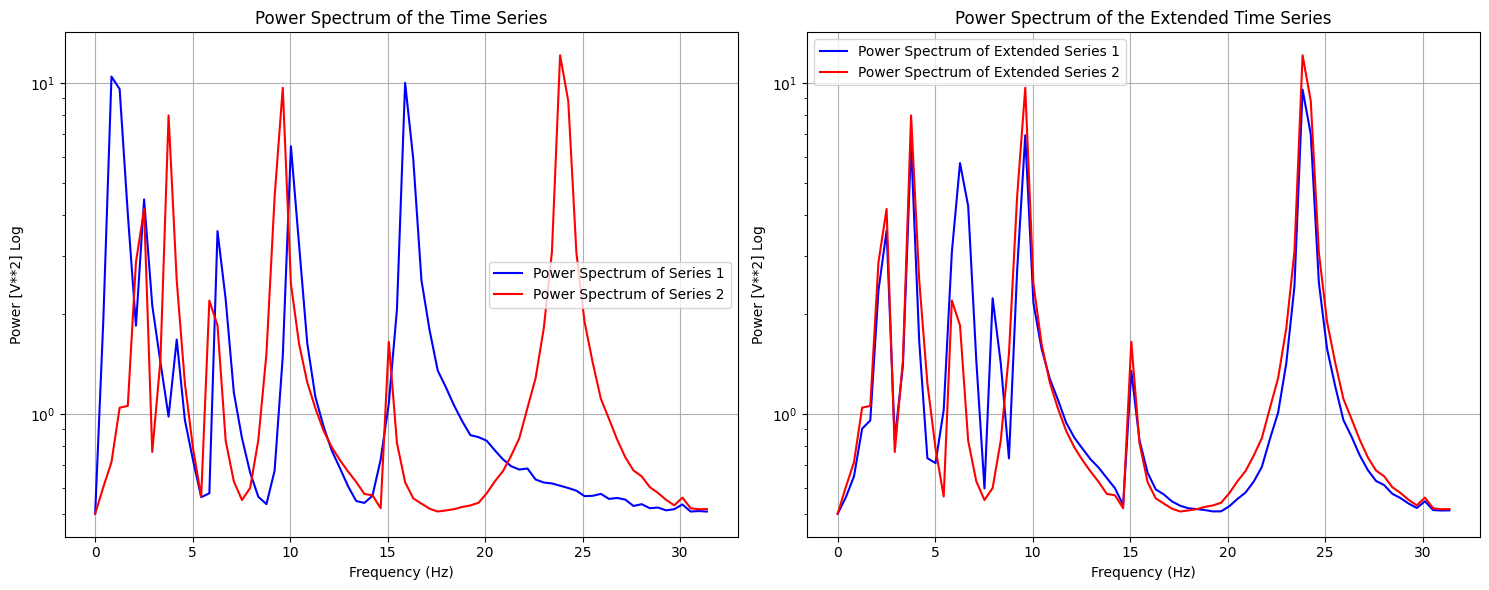

In [207]:
power_spectrum1, freqs1 = my_power_spectrum(series1, delta)
power_spectrum2, freqs2 = my_power_spectrum(series2, delta)

power_spectrum1E, freqs1E = my_power_spectrum(seriesE1, delta)
power_spectrum2E, freqs2E = my_power_spectrum(seriesE2, delta)


plt.figure(figsize=(15, 6))
# Original Series Periodogram
plt.subplot(1, 2, 1)
plt.plot(freqs1, power_spectrum1, label="Power Spectrum of Series 1", color='blue')
plt.plot(freqs2, power_spectrum2, label="Power Spectrum of Series 2", color='red')
plt.title('Power Spectrum of the Time Series')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power [V**2] Log')
plt.yscale('log')
plt.legend()
plt.grid(True)
# Extended Series Periodogram
plt.subplot(1, 2, 2)
plt.plot(freqs1E, power_spectrum1E, label="Power Spectrum of Extended Series 1", color='blue')
plt.plot(freqs2E, power_spectrum2E, label="Power Spectrum of Extended Series 2", color='red')
plt.title('Power Spectrum of the Extended Time Series')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power [V**2] Log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




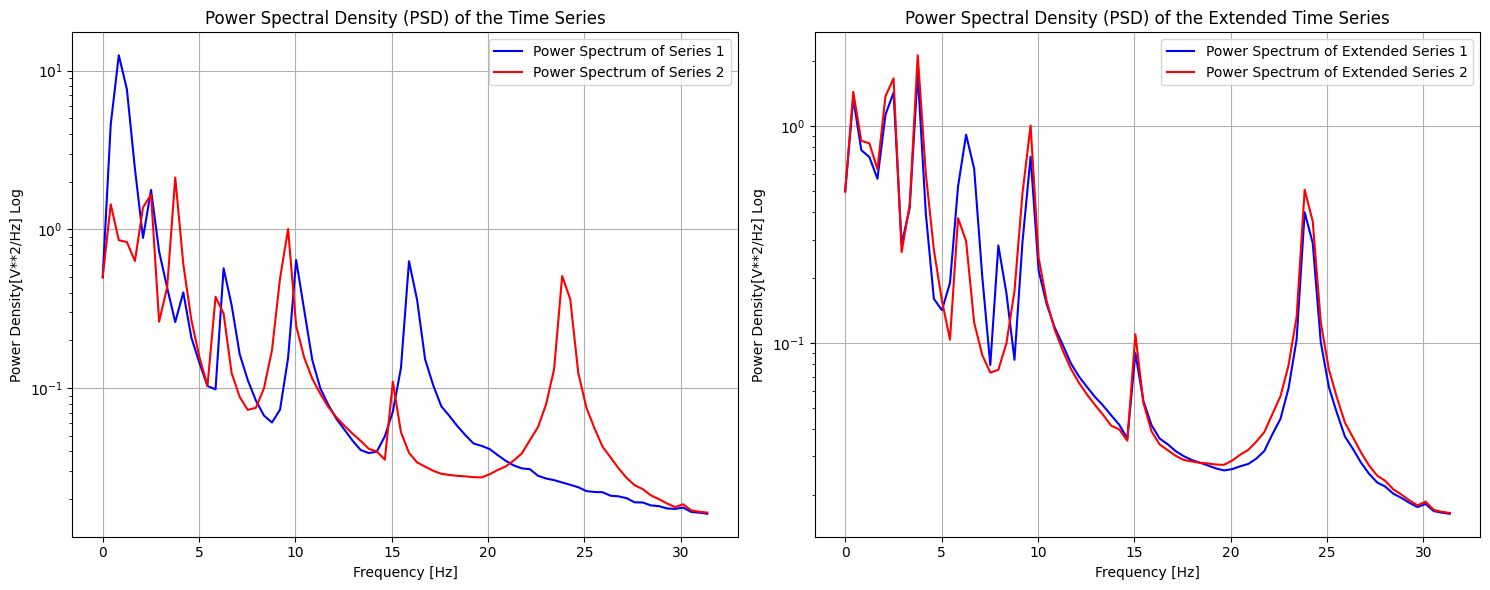

In [208]:
freqs1_NZ = freqs1.copy()
freqs1_NZ[0] = 1
psd1 = power_spectrum1/ freqs1_NZ

freqs2_NZ = freqs2.copy()
freqs2_NZ[0] = 1
psd2 = power_spectrum2/ freqs2_NZ

freqs1E_NZ = freqs1E.copy()
freqs1E_NZ[0] = 1
psd1E = power_spectrum1E/ freqs1E_NZ

freqs2E_NZ = freqs2E.copy()
freqs2E_NZ[0] = 1
psd2E = power_spectrum2E/ freqs2E_NZ


plt.figure(figsize=(15, 6))
# Original Series Periodogram
plt.subplot(1, 2, 1)
plt.plot(freqs1, psd1, label="Power Spectrum of Series 1", color='blue')
plt.plot(freqs2, psd2, label="Power Spectrum of Series 2", color='red')
plt.title('Power Spectral Density (PSD) of the Time Series')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Density[V**2/Hz] Log')
plt.yscale('log')
plt.legend()
plt.grid(True)
# Extended Series Periodogram
plt.subplot(1, 2, 2)
plt.plot(freqs1E, psd1E, label="Power Spectrum of Extended Series 1", color='blue')
plt.plot(freqs2E, psd2E, label="Power Spectrum of Extended Series 2", color='red')
plt.title('Power Spectral Density (PSD) of the Extended Time Series')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Density[V**2/Hz] Log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


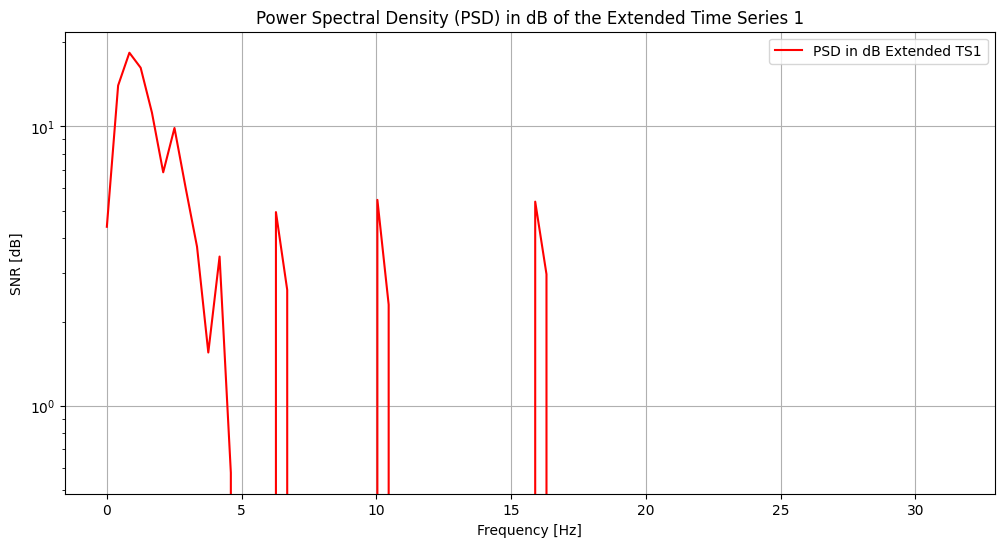

(0.18253011557146076, 17.986928104575163)

In [175]:
# Identifying the noise floor in the PSD
# Assuming noise floor is relatively flat and occurs at higher frequencies
# We can estimate it by taking an average over the high-frequency range

# Selecting a high-frequency range for estimating the noise floor
high_freq_range = freqs1 > (0.1 * max(frequencies))  # Consider frequencies above half of the maximum sinusoid frequency
noise_floor = np.mean(psd1[high_freq_range])

# Calculating the bandwidth of the noise
# Here, bandwidth is defined as the frequency range where the noise power is significant
# We consider the range where the PSD is within a certain threshold of the noise floor
threshold_factor = 0.25  # Threshold factor for determining significant noise power
bandwidth_indices = np.where(psd1 < threshold_factor * noise_floor)[0]
bandwidth = freqs1[bandwidth_indices[-1]] - freqs1[bandwidth_indices[0]]

# Transforming the PSD into SNR in dB
# SNR (dB) = 10 * log10(signal power / noise power)
# Here, we consider signal power as the PSD and noise power as the noise floor
snr_db = 10 * np.log10(psd1 / noise_floor)

# Plotting the PSD in dB
plt.figure(figsize=(12, 6))
plt.semilogy(freqs1, snr_db, label="PSD in dB", color='red')
plt.title("Power Spectral Density (PSD) in dB of the Extended Time Series1")
plt.xlabel("Frequency [Hz]")
plt.ylabel("SNR [dB]")
plt.legend()
plt.grid(True)
plt.show()

# Outputs: noise_floor, bandwidth
noise_floor, bandwidth

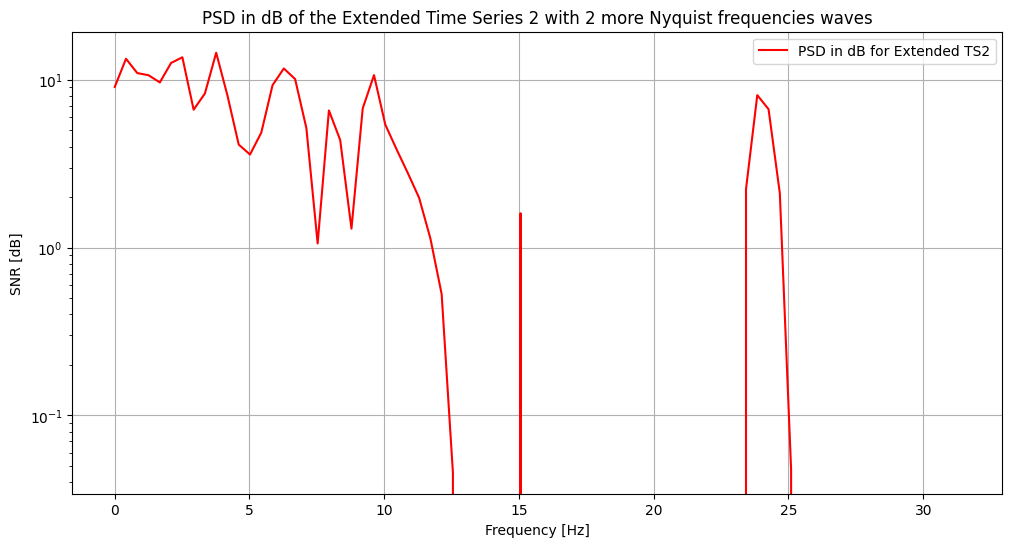

(0.18253011557146076, 17.986928104575163)

In [214]:
high_freq_range2 = freqs2 > (0.15* max(frequencies2))  # Consider frequencies above half of the maximum sinusoid frequency
noise_floor2 = np.mean(psd2[high_freq_range2])

# Calculating the bandwidth of the noise
# Here, bandwidth is defined as the frequency range where the noise power is significant
# We consider the range where the PSD is within a certain threshold of the noise floor
threshold_factor = 0.55  # Threshold factor for determining significant noise power
bandwidth_indices2 = np.where(psd2 < threshold_factor * noise_floor2)[0]
bandwidth2 = freqs2[bandwidth_indices2[-1]] - freqs2[bandwidth_indices2[0]]

# Transforming the PSD into SNR in dB
# SNR (dB) = 10 * log10(signal power / noise power)
# Here, we consider signal power as the PSD and noise power as the noise floor
snr_db2 = 10 * np.log10(psd2 / noise_floor2)

# Plotting the PSD in dB
plt.figure(figsize=(12, 6))
plt.semilogy(freqs2, snr_db2, label="PSD in dB for Extended TS2", color='red')
plt.title("Power Spectral Density (PSD) in dB of the Extended Time Series 2")
plt.xlabel("Frequency [Hz]")
plt.ylabel("SNR [dB]")
plt.legend()
plt.grid(True)
plt.show()

# Outputs: noise_floor, bandwidth
noise_floor, bandwidth

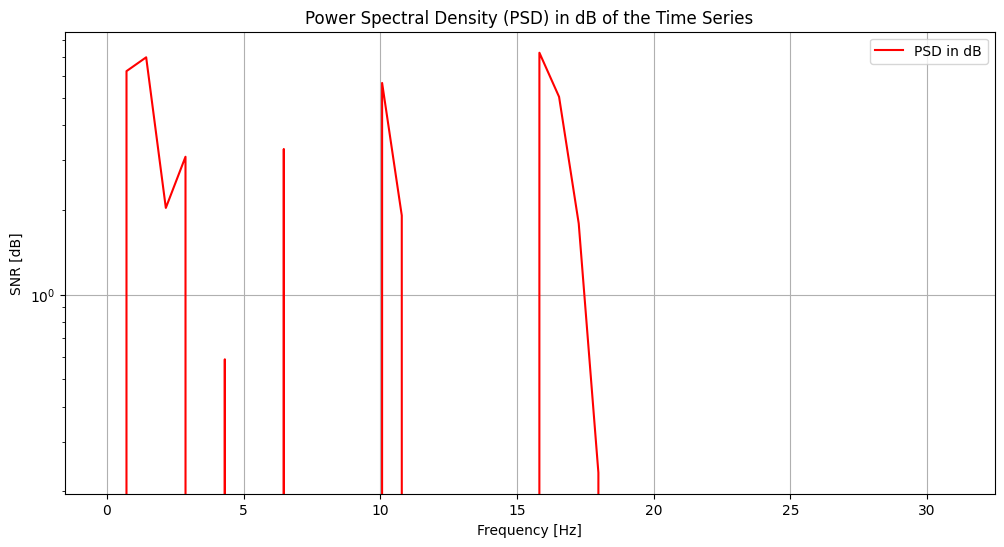

(1.197799802011187, 30.92134831460674)

In [109]:
high_freq_range = freqs1 > (0.95 * max(frequencies))  # Consider frequencies above half of the maximum sinusoid frequency
noise_floor = np.mean(power_spectrum1[high_freq_range])

# Calculating the bandwidth of the noise
# Here, bandwidth is defined as the frequency range where the noise power is significant
# We consider the range where the PSD is within a certain threshold of the noise floor
threshold_factor = 0.5  # Threshold factor for determining significant noise power
bandwidth_indices = np.where(power_spectrum1 < threshold_factor * noise_floor)[0]
bandwidth = freqs1[bandwidth_indices[-1]] - freqs1[bandwidth_indices[0]]

# Transforming the PSD into SNR in dB
# SNR (dB) = 10 * log10(signal power / noise power)
# Here, we consider signal power as the PSD and noise power as the noise floor
snr_db = 10 * np.log10(power_spectrum1 / noise_floor)

# Plotting the PSD in dB
plt.figure(figsize=(12, 6))
plt.semilogy(freqs1, snr_db, label="PSD in dB", color='red')
plt.title("Power Spectral Density (PSD) in dB of the Time Series")
plt.xlabel("Frequency [Hz]")
plt.ylabel("SNR [dB]")
plt.legend()
plt.grid(True)
plt.show()
# Outputs: noise_floor, bandwidth
noise_floor, bandwidth

In [212]:
# Calculating the expected aliased frequencies
def calculate_aliased_frequency(f_sample, f_nyquist):
    n = int(f_sample // f_nyquist)
    f_aliased = np.abs(f_sample - n * f_nyquist)
    return f_aliased

# Expected aliased frequencies for the two high-frequency sinusoids
aliased_freq1 = calculate_aliased_frequency(high_freq1, nyquist_frequency)
aliased_freq2 = calculate_aliased_frequency(high_freq2, nyquist_frequency)

aliased_freq1, aliased_freq2


(9.599999999999994, 24.0)